# UNO Card Game Simulator

This is the steering console where simulations of the UNO card game can be executed. There are two different Reinforcement Learning Models implemented, which can be selected together with their respective model parameters.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Win-Rate" data-toc-modified-id="Win-Rate-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Win Rate</a></span></li><li><span><a href="#Q-Values" data-toc-modified-id="Q-Values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Q-Values</a></span></li><li><span><a href="#Visits" data-toc-modified-id="Visits-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visits</a></span></li><li><span><a href="#Possible-Moves" data-toc-modified-id="Possible-Moves-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Possible Moves</a></span></li></ul></li><li><span><a href="#Extraction" data-toc-modified-id="Extraction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extraction</a></span></li></ul></div>

### Import
***

In [2]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

sns.set()

In [3]:
def bold(string):
    chr_start = "\033[1m"
    chr_end = "\033[0m"
    print (chr_start + string + chr_end)
    
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

In [4]:
def color_lib(categories):
    """
    This function generates a dictionary that assigns a specific color from a color spectrum to each fund.
    It enables consistent coloring across visualizations.
    """
    
    c_scale = cm.rainbow(np.linspace(0,1,len(categories)))
    c_dict = {}

    for i,c in zip(categories,c_scale):
        c_dict[i] = c
        
    return c_dict

### Analysis
***

In [5]:
df = pd.read_csv('../assets/results.csv')
df.head()

,winner,turns,win_rate
0,Bernhard,13,1.000000
1,Magdalena,63,0.500000
2,Bernhard,35,0.666667
3,Magdalena,33,0.500000
4,Magdalena,126,0.400000


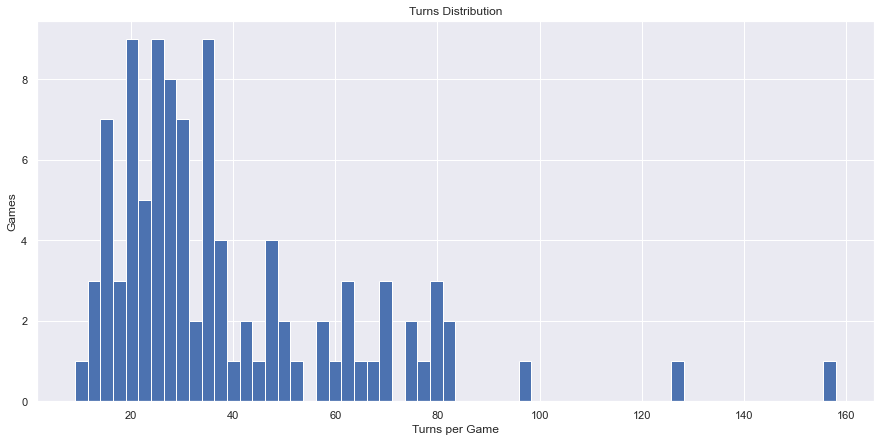

In [6]:
fig = plt.figure(1, figsize=(15,7))

plt.hist(df["turns"], bins =60, edgecolor = "w")
plt.title("Turns Distribution")
plt.xlabel("Turns per Game")
plt.ylabel("Games")

plt.show()

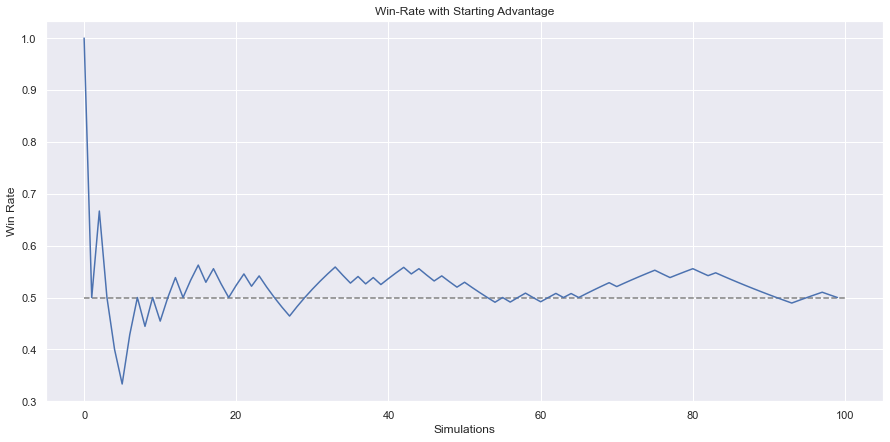

In [7]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df.index, df["win_rate"])
plt.hlines(0.5, 0, len(df), colors="grey", linestyles="dashed")

plt.title("Win-Rate with Starting Advantage")
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.show()

#### Q-Values

In [10]:
q_values = pd.read_csv('../assets/q-values.csv',index_col='id')
q_values.head()

,RED,GRE,BLU,YEL,SKI,REV,PL2,PL4,COL
id,,,,,,,,,
"('RED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"('RED', 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"('RED', 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"('RED', 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"('RED', 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


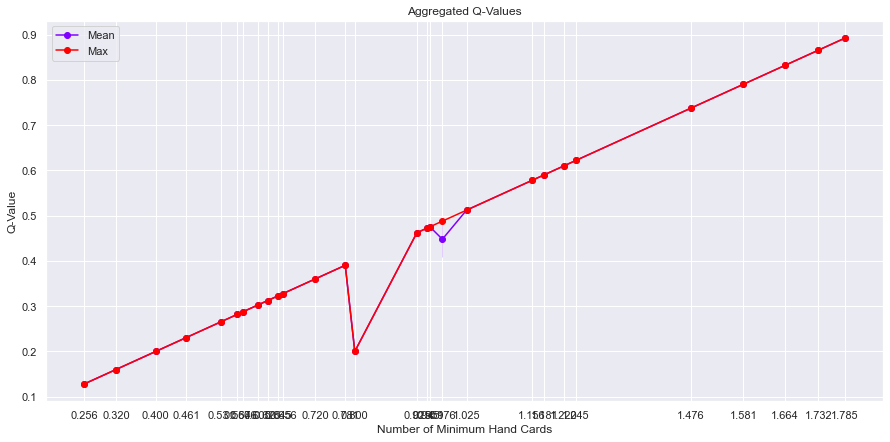

In [15]:
q_curve = q_values.copy()

q_curve["HAND"] = q_curve.sum(axis=1)
q_curve["MAX"]  = q_curve[["RED","GRE","BLU","YEL","SKI","REV","PL2","PL4","COL"]].max(axis = 1)
q_curve = q_curve [["HAND","MAX"]].replace(0, np.NaN)

q_mean = pd.Series(q_curve.groupby("HAND").mean()["MAX"])
q_max  = pd.Series(q_curve.groupby("HAND").max()["MAX"])
q_std  = pd.Series(q_curve.groupby("HAND").std()["MAX"])/2

fig = plt.figure(1, figsize=(15,7))
colors = color_lib(["Mean","Max"])

plt.plot(q_mean.index, q_mean, label="Mean", marker = "o", c = colors["Mean"])
plt.plot(q_max.index,  q_max,  label="Max",  marker = "o", c = colors["Max"])
plt.fill_between(q_mean.index, q_mean-q_std, q_mean+q_std, color = colors["Mean"], alpha=0.2)

plt.xticks(q_mean.index)
plt.xlabel("Number of Minimum Hand Cards")
plt.ylabel("Q-Value")
plt.title("Aggregated Q-Values")
plt.legend()
plt.show()

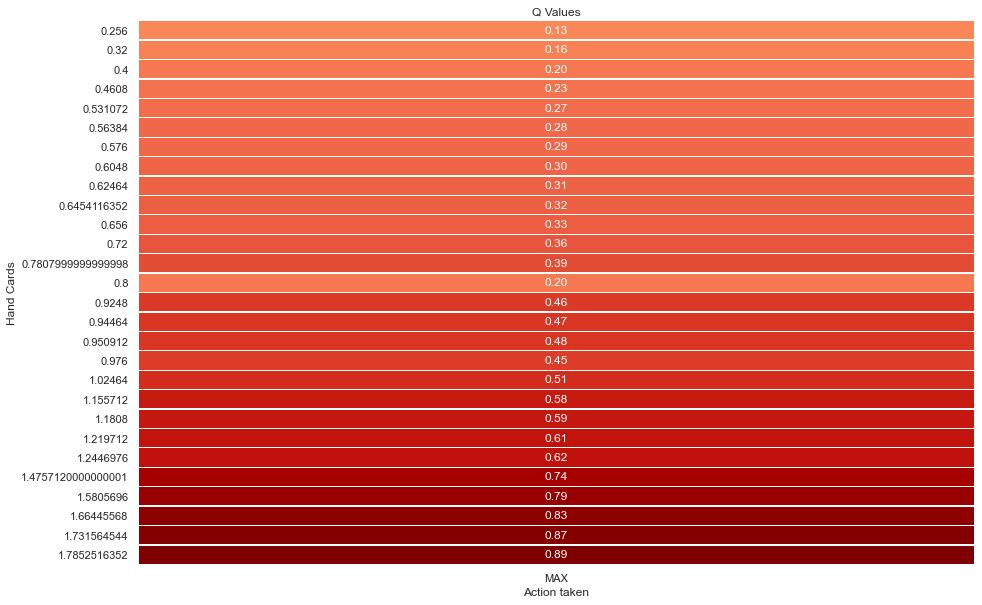

In [17]:
q_pivot = q_curve.replace(0, np.NaN)
q_pivot = q_pivot.groupby("HAND").mean()


# Plotting
fig, ax = plt.subplots(1, 1, figsize = (15,10))

sns.heatmap(q_pivot, 
            fmt=".2f", 
            cmap = "OrRd", 
            linewidth = 0.3, 
            annot = True,
            cbar = False,
            center = 0.1)

ax.title.set_text("Q Values")
ax.set(xlabel="Action taken", ylabel="Hand Cards")
plt.show()

#### Visits

In [124]:
q_visited = (q_table != 0).values.sum()
q_possible = 0

for i in range(len(q_table)):
    q_possible += sum(q_table.index[i][8:])
    
print (f'From {q_possible:,} possible combinations {q_visited:,} or {q_visited/q_possible*100:.2f}% have been visited')

From 972,000 possible combinations 62,709 or 6.45% have been visited


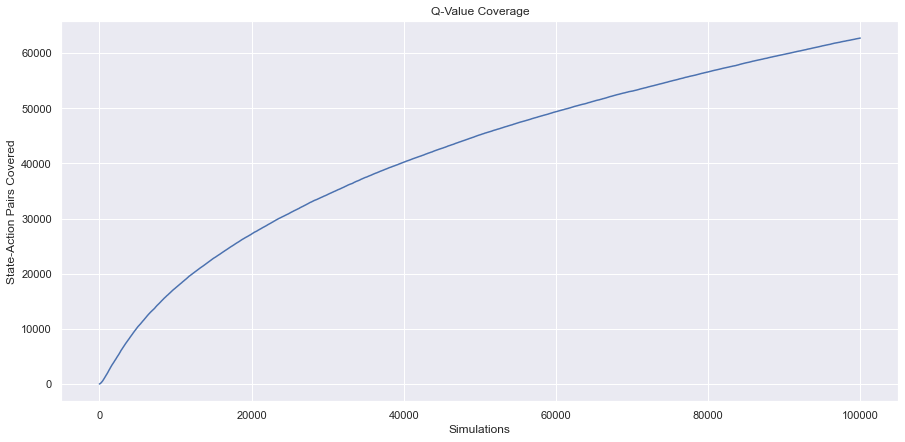

In [127]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(pd.Series(coverage))

plt.xlabel("Simulations")
plt.ylabel("State-Action Pairs Covered")
plt.title("Q-Value Coverage")
plt.show()

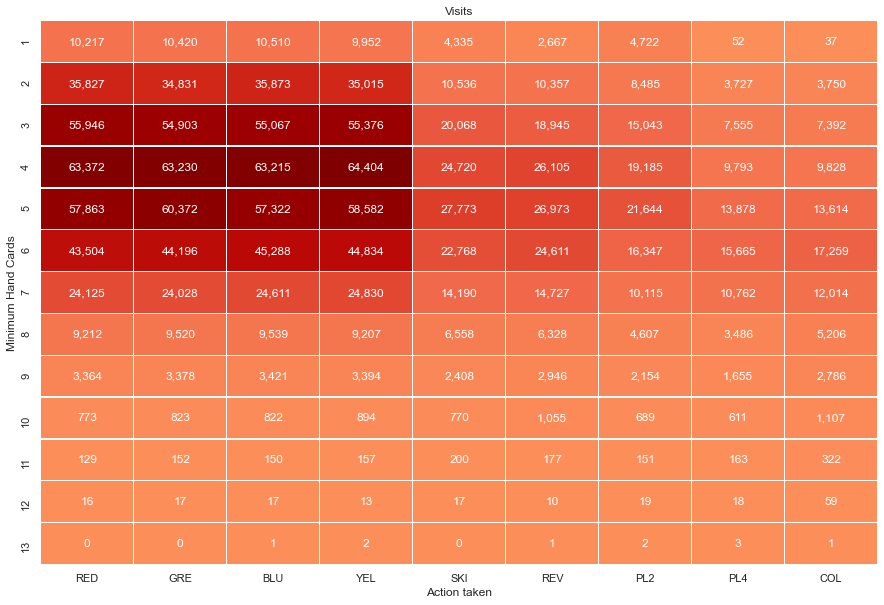

In [130]:
visit = uno.agent.visit.copy()

# Data prep
visit["HAND"] = visit.index.map(lambda x: sum(x[1:10]))
visit = visit.replace(0, np.NaN)
visit = visit.groupby("HAND").sum()
visit.index = visit.index.astype(int)


# Plotting
fig, ax = plt.subplots(1, 1, figsize = (15,10))

sns.heatmap(visit, 
            fmt= ",.0f", 
            cmap = "OrRd", 
            linewidth = 0.3, 
            annot = True,
            cbar = False,
            center = 0.1)

ax.title.set_text("Visits")
ax.set(xlabel="Action taken", ylabel="Minimum Hand Cards")
plt.show()

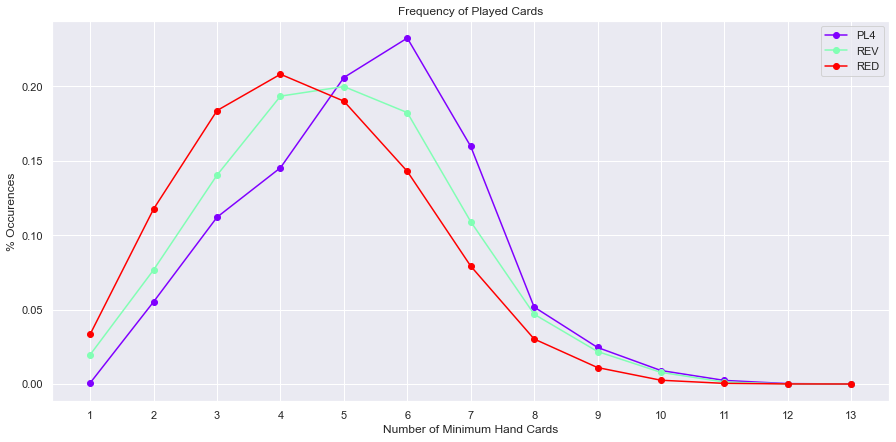

In [118]:
card_type = ["PL4","REV","RED"]
colors = color_lib(card_type)

# Plotting
fig = plt.figure(1, figsize=(15,7))

for i in card_type:
    temp = visit[i]/sum(visit[i])
    plt.plot(temp.index, temp, label=i, marker = "o", c = colors[i])


# Formatting
plt.xticks(temp.index)
plt.xlabel("Number of Minimum Hand Cards")
plt.ylabel("% Occurences")
plt.title("Frequency of Played Cards")
plt.legend()
plt.show()

#### Possible Moves

In [131]:
actions = q_table.columns.to_list()

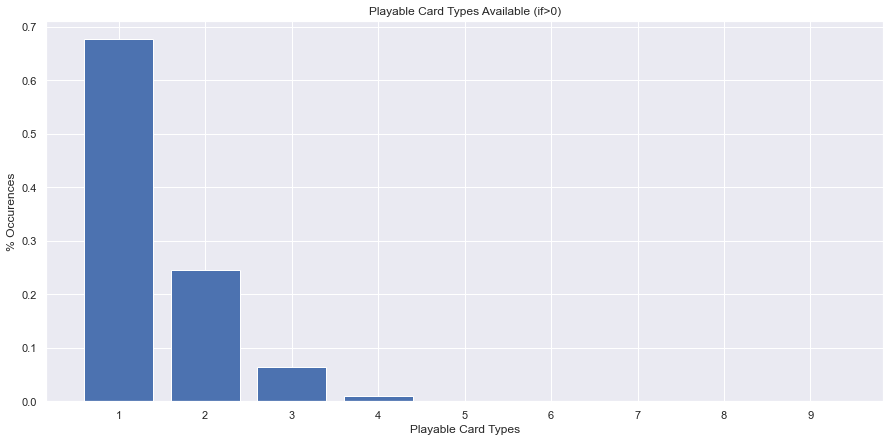

In [138]:
q_check = uno.agent.visit.copy()

# Data prep
q_check["STATE"] = q_check.index
q_check["H_PLAY"]  = q_check["STATE"].apply(lambda x: sum(x[8:]))
q_check = q_check.reset_index(drop = True)

# Plotting
fig = plt.figure(1, figsize=(15,7))

possib = q_check.groupby("H_PLAY").sum()
possib = possib[actions].sum(axis=1)
possib = possib/possib.sum()
possib = possib[1:]

plt.bar(possib.index, possib.values)

# Formatting
plt.xticks(possib.index)
plt.xlabel("Playable Card Types")
plt.ylabel("% Occurences")
plt.title("Playable Card Types Available (if>0)")
plt.show()

### Extraction
***

In [28]:
# Model files
q_table.to_csv        ("../assets/files/"+widg_algo.value+"-q.csv", sep = ";")
uno.agent.visit.to_csv("../assets/files/"+widg_algo.value+"-visits.csv", sep = ";")

# Log files
pd.Series(coverage).to_csv("../assets/files/"+widg_algo.value+"-coverage.csv", sep = ";")
result.to_csv             ("../assets/files/"+widg_algo.value+"-result.csv", sep = ";")